<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_p_409~451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

p.409~451
##**07 군집화**
###**K-평균 알고리즘 이해**
* 군집중심 이라는 임의의 지점을 선택해 해당 중심에 가까운 포인트를 선택하는 군집화 기법
* 반복적 수행
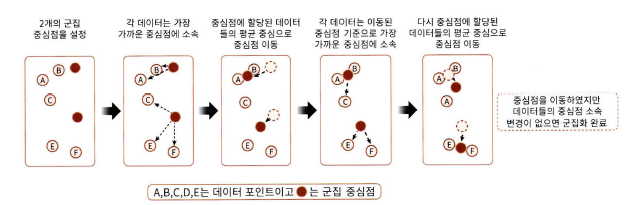

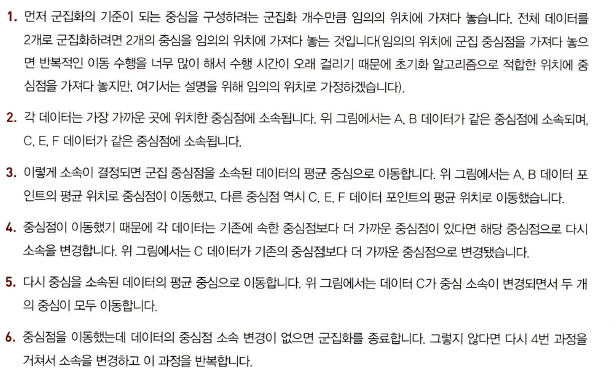

K-평균 장점
> * 일반적 군집화에서 가장 많이 사용되는 알고리즘
> * 알고리즘이 쉽고 간결

K-평균 단점
>* 거리기반 알고리즘으로 속성의 수가 많을 경우 군집화정확도가 떨어진다.
>* 반복 횟수가 많을 경우 수행시간 느려짐
>* 몇개의 군집을 선택해야 할지 가이드 어렵

**사이킷런 KMeans 클래스 소개**

다음과 같은 초기화 파라미터를 가지고 있다

In [ ]:
#class sklearn.cluster.KMeans(n_clusters=8,init='k-means++',n_init=10,max_iter=300,tol=0.0001,precompute_distances='auto',verbose=0,random_state=None,copy_x=True,n_jobs=1,algorithm='auto')

* Kmeans 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters이며, 군집화할 개수, 군집 중심점의 개수를 의미한다.
* init은 초기에 군집 중심점 좌표를 설정할 방식을 의미, 중심을 설정하지 않고 일반적으로 k-means++ 로 설정한다.
* max_iter는 최대 반복 횟수이고 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.
* labels_:각 데이터 포인트가 속한 군집 중심점 레이블
* cluster_centers_: 각 군집 중심점 좌표


**K-평균을 이용한 붓꽃 데이터 세트 군집화**


In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
#더 편한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


3개 그룹으로 군집화 해본다.

n_cluster는 3, 최대반복 횟수도 디폴트값으로 설정하고 fit()을 수행한다.

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

fit()을 수행해 irisDF 데이터에 대한 군집화 수행결과가 kmeans 객체 변수로 반환되었다. 속성값을 확인해보면 irisDF의 각 데이터가 어떤 중심에 속하는지 알 수 있다.

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


0,1,2는 각 레코드가 첫번째, 두번째, 세번째 군집에 속한다.

labels_ 값을 'cluster'칼럼으로 지정하여 target과 비교한다.

In [ ]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


군집화를 시각화한다. 속성이 4개이므로 PCA를 통해 2개로 차원을 축소하고 개별데이터를 표현하도록 한다.

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


cluster 0은 마커 'o', cluster1은 마커 's', cluster2는 마커 '^'로 표현한다.

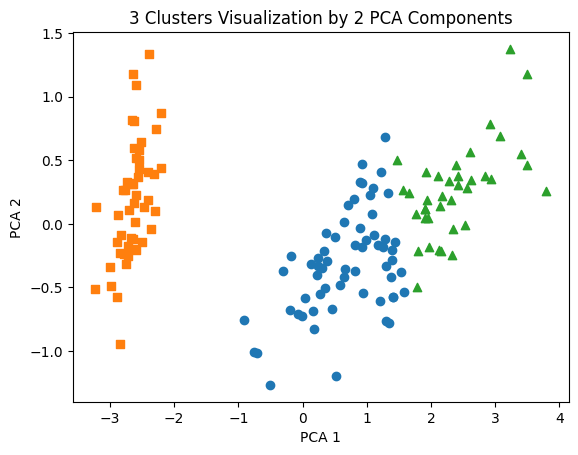

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

**군집화 알고리즘 테스트를 위한 데이터 생성**

군집화용 데이터 생성기
* make_blobs(): 개별 군집의 중심점과 표준편차 제어기능 추가
* make_classification(): 노이즈를 포함한 데이터를 만드는데 유용하게 사용



make_blobs()의 호출 파라미터
* n_samples: 생성할 데이터 개수
* n_features: 데이터 피처 개수
* centers: int값, ndarray형태로 표현할 경우 개별 군집 중심점의 좌표를 의미
* cluster_std: 생성될 군집 데이터의 표준편차


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
X,y = make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape,y.shape)

#y target 값의 분포를 확인
unique, counts=np.unique(y,return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
import pandas as pd
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


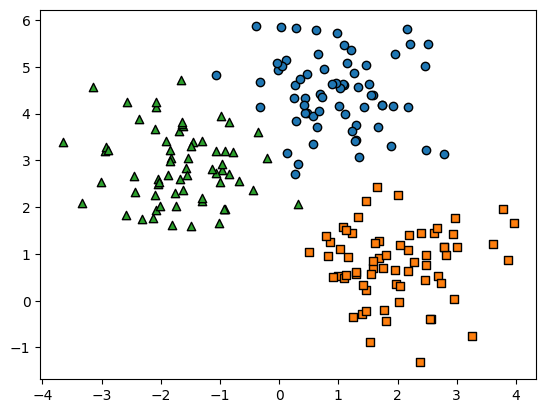

In [17]:
target_list=np.unique(y)
#각 타깃별 산점도의 마커값
markers=['o','s','^','P','D','H','x']
#3개의 군집영역으로 구분한 데이터를 생성했으므로 target_list는 [0,1,2]
#target=0,target=1,target=2로 scatter plot을 marker별로생성
for target in target_list:
  target_cluster=clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',marker=markers[target])

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


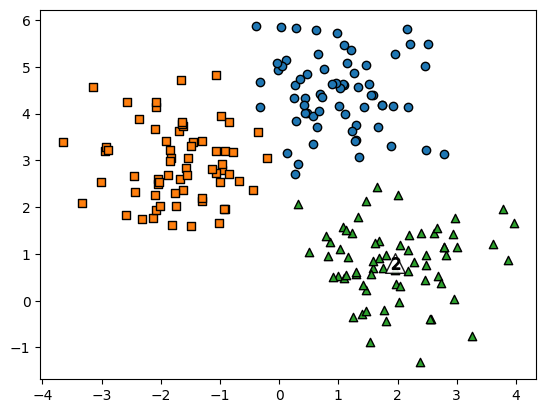

In [20]:
#군집별 시각화
# KMeans 객체를 이용해 X데이터를 K-Means 클러스터링 수행
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

#군집된 label 유형별로 iteration하면서 marker별로 scatter plot 수행
for label in unique_labels:
  label_cluster=clusterDF[clusterDF['kmeans_label']==label]
  center_x_y=centers[label]
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])

#군집별 중심위치 좌표 시각화
plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',alpha=0.9,edgecolor='k',marker=markers[label])
plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',marker='$%d$' % label)

plt.show()

make_blobs()의 타깃과 kmeans_label은 군집번호를 의미하므로 다른값으로 매핑될 수 있다.

In [21]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


cluster_std가 작을수록 군집중심에 데이터가 모여있다.

###**군집평가**
군집화는 분류와 유사해보여도 성격이 다르다. 세분화된 군집화에 초점을 맞춘다. 군집화 성능을 평가하는데는 실루엣 분석이 있다.

**실루엣 분석의 개요**

각 군집간의 거리가 얼마나 효율적으로 분리되어있는지 나타낸다.

* 실루엣계수: 개별데이터가 가지는 군집화 지표로 같은 군집 내의 데이터와 얼마나 가깝게 군집화 되어있는지 나타내는 지표

같은 군집내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i), 해당 데이터가 속하지 않은 군집중 가장 가까운 군집과의 평균거리 b(i)기반으로 계산

i번째 데이터포인트의 실루엣계수값 s(i)

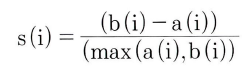

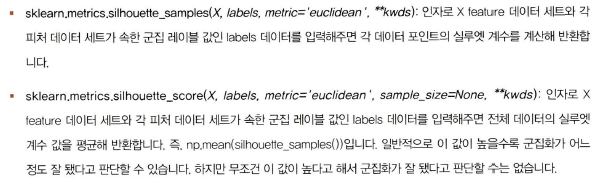

1. 실루엣 계수의 평균값, silhouette_score()값은 0~1이며 1에 가까울수록 좋다
2. 평균값의 편차가 크지 않아야한다.

###**붓꽃 데이터세트를 이용한 군집평가**

In [22]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head(3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


평균실루엣 값이 0.553이다. 군집별 평균실루엣 계수 값을 알아보려면 irisDF DataFrame에서 군집 칼럼별로 group by하여 평균을 구한다

In [23]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

**군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

실루엣계수가 높다고 반드시 군집화가 잘된것은 아님
특정 군집내 실루엣계수만 높고 다른군집은 데이터끼리 떨어져 있어 평균만 높게 나올 수도 있다.

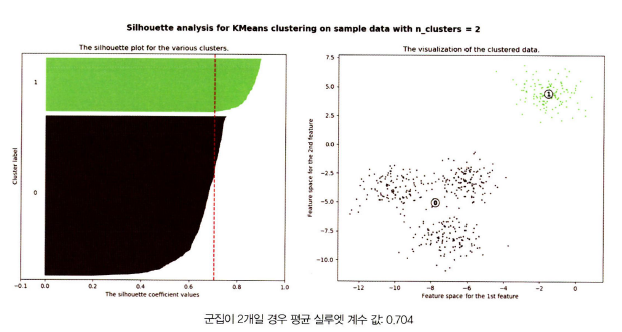

-> 1번 군집은 0번과 멀리 떨어져있고 내부데이터와도 잘 뭉쳐있지만 0번군집은 내부데이터끼리 떨어져있다.

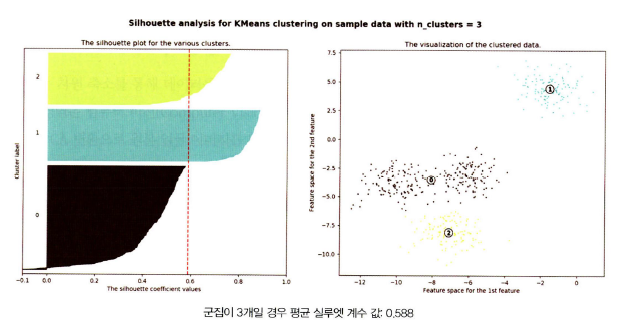

-> 2번은 평균보다 높은 실루엣계수, 0번의경우 내부데이터와도 거리가멀고 2번군집과도 가까이 위치해있다.

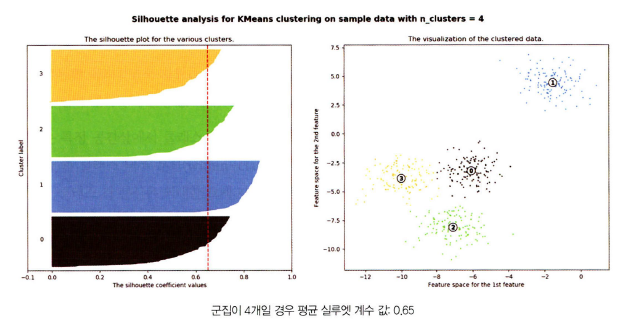

-> 평균이 균일하게 위치하고 있다. 2개의 군집화보다 더 이상적이지만 실루엣계수는 낮다.

In [24]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

In [26]:
def visualize_silhouette(cluster_lists, X_features):

    # 입력값으로 클러스 터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


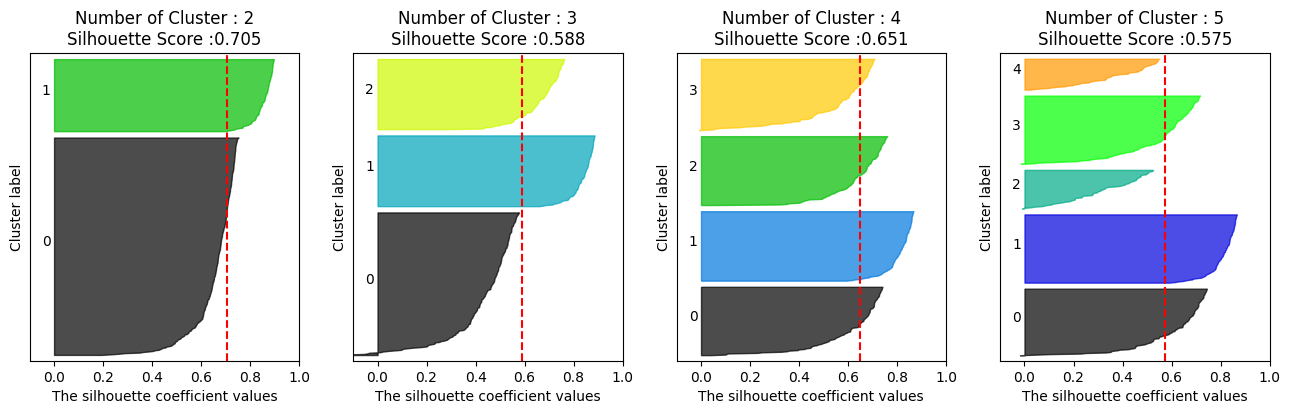

In [27]:
# 군집개수에 따른 실루엣계수 평균값 시각화
visualize_silhouette([2, 3, 4, 5], X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


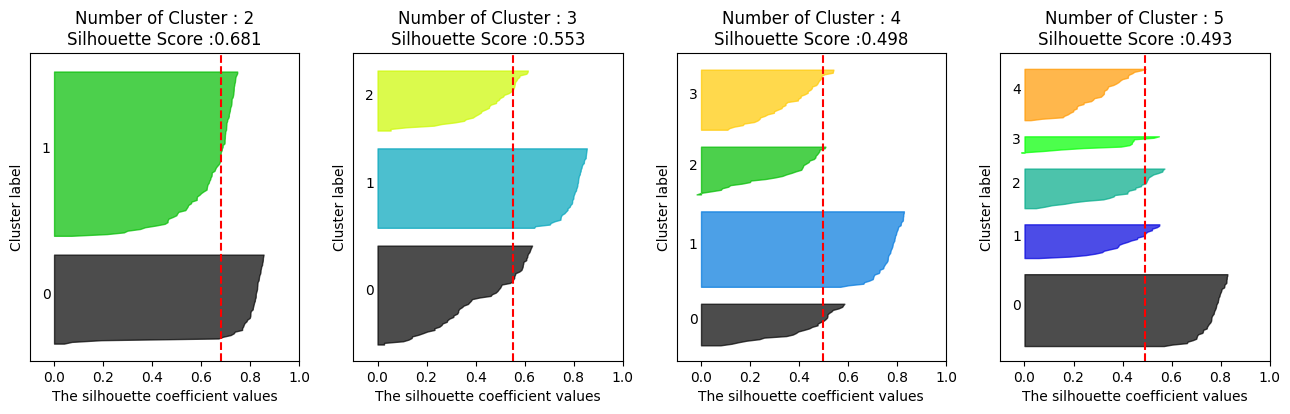

In [28]:
# K-평균 수행시 최적의 군집 개수 알아보기
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5],iris.data)

###**평균이동**
**평균이동의 개요**

평균이동은 중심을 데이터가 모여있는 밀도가 가장 높은곳으로 이동시킨다.

평균이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾는다. 확률밀도함수를 찾기위해 KDE를 활용한다.

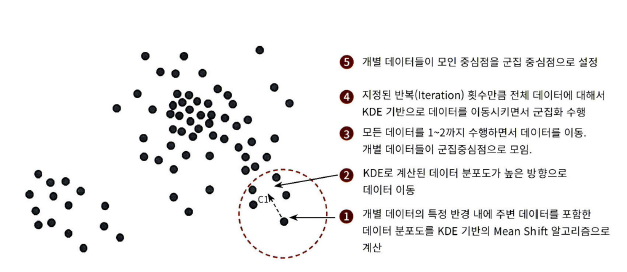

* KDE 함수를 통해 어떤 변수의 확률밀도 함수를 추정하는 대표적 방법이다.
* 관측된 데이터 각각에 커널함수를 적용한 값을 모두 더하고 데이터 건수로 나누어 확률밀도 함수를 추정
* 커널함수는 대표적으로 가우시안 분포함수 사용

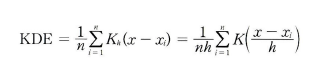

-> K는 커널함수, x는 확률 변숫값, xi는 관측값, h는 대역폭이다.
-> h는 형태를 부드러운 형태로 평활화하는데 적용되며 h설정에따라 확률밀도 추정성능을 좌우할 수 있다.
* h가 크면 과도하게 평활화된 KDF로 인해 단순화된 방식으로 확률밀도 함수를 추정하며 결과적으로 과소적합 하기 쉽다.
* 대역폭이 적을수록 많은 수의 군집 중심점을 가진다.
* 사이킷런은 평균 이동 군집화를 위해 MeanShift클래스를 제공한다.

In [29]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


군집이 6개로 분류되었다. bandwidth를 작게할수록 군집 개수가 많아진다.

In [30]:
#bandwidth를 1.0으로 변형하고 수행
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [31]:
#최적화된 bandwidth값을 찾기위해 estimate_bandwidth()를 제공
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [32]:
#estimate_bandwidth()로 측정된 bandwidth를 평균 이동 입력값으로 적용해 동일한 make_blobs() 데이터 세트에 군집화 수행
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

#estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


3개의 군집으로 구성되어있다. 평균이동도 K-평균과 유사하게 중심을 가지고 있으므로 cluster_centers_속성으로 군집 중심 좌표를 표시할 수 있다.

<ipython-input-33-9989607841e4>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='' % label)


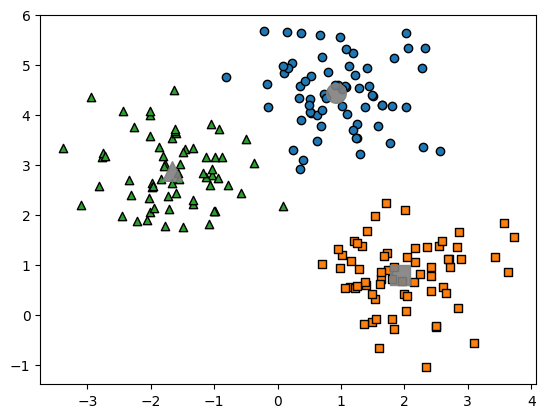

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]

  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='' % label)

plt.show()

In [35]:
# target값과 군집 label값을 비교
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


###**GMM**
**GMM소개**

GMM군집화는 군집화를 적용하고자하는 데이터가 여러개의 가우시안 분포를 가진 데이터 집합들이 섞여 생성된 것이라는 가정하에 군집화를 수행하는 방식

-> 서로다른 정규분포 형태를 가진 여러가지 확률 분포 곡선으로 구성될 수 있으며, 서로다른 정규분포에 기반해 군집화를 수행하는 것

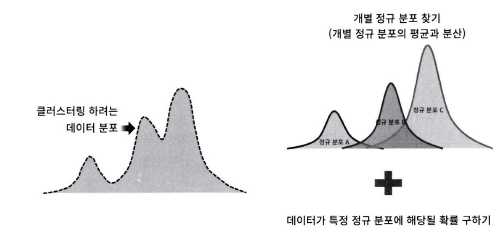

이러한 방식은 모수추정이라고한다

* 개별 정규분포의 평균과 분산
* 각 데이터가 어떤 정규분포에 해당되는지 확률
을 추정하는 것이다.

**GMM을 이용한 붓꽃 데이터세트 군집화**

GMM은 확률기반 군집화, K-평균은 거리기반 군집화

In [36]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

n_components는 gaussian mixture의 모델의 총개수로 K-평균의 n_cluster와 같이 군집의 개수를 정하는데 중요한 역할을 수행한다.

In [37]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


K평균 군집화보다 더 효과적인 분류결과가 도출되었다. 붓꽃 데이터세트의 K-평균 군집화를 수행한 결과를 확인한다.

In [38]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


어떤 알고리즘이 효과적이라기보다 붓꽃 데이터세트가 GMM군집화에 더 효과적이라는 뜻이다.

**GMM과 K-평균의 비교**

데이터세트가 원형범위를 가질수록 KMeans의 군집화 효율은 더 높다.
-> 데이터가 원형의 범위가 아닐때 군집화 수행을 잘 못한다.

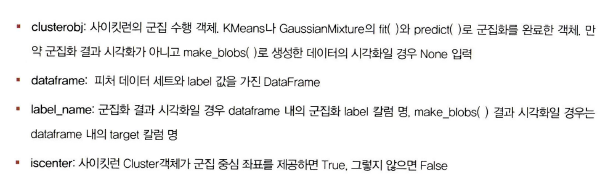

군집시각화를 위해 visual_cluster_plot함수를 정의한

In [39]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

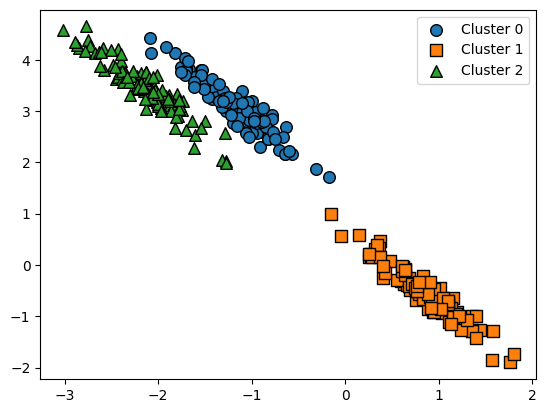

In [40]:
# 시각화
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
#feature 데이터 세트와 make_blobs()의 y결과값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

#생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

KMeans가 위 데이터세트를 군집화 하는 방법을 확인해본다

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-39-f4c266540d94>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\


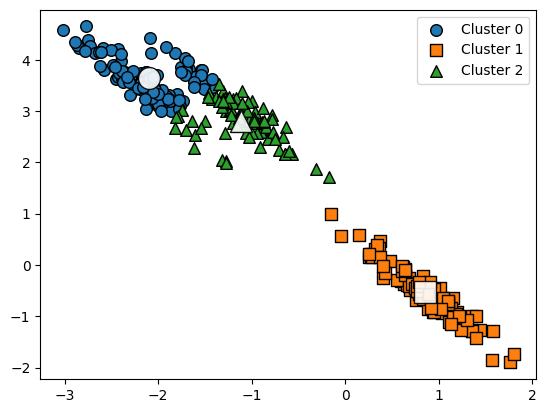

In [41]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

KMeans로 군집화를 할 경우, 원형 영역 위치로 개별군집화가 되면서 원하는 방향으로 구성되지 않는다.

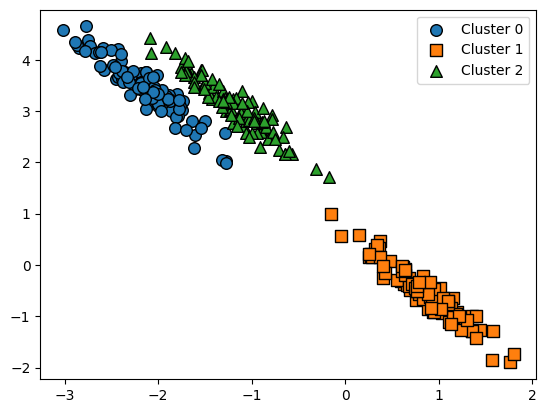

In [42]:
# GMM군집화 수행
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscluster를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

데이터가 분포된 방향에 따라 정확하게 군집화되었다. GMM은 K-평균과 다르게 군집의 중심좌표를 구할 수 없기 때문에 visualize_cluster_plot()에서 시각화되지 않는다.


In [43]:
#make_blobs()의 target값과 KMeans, GMM의 군집 Label을 비교한다.
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


KMeans의 경우 군집1만 정확히 매핑, 나머지 군집은 target과 어긋나는 경우가 발생한다. GMM은 KMeans보다 다양한 데이터에 잘 적용되는 장점이 있다.

###**DBSCAN**
**DBSCAN개요**

원모양 형태의 분포를 가진 데이터세트를 군집화할때, 기존 방식으로 수행이 어렵지만 DBSCAN은 데이터 밀도차이를 기반 알고리즘으로 하고 있어 복잡한 기하학적 분포도를 가진 데이터 세트에 대해 군집화를 잘 수행한다

* DBSCAN을 구성하는 두가지 파라미터
>* 입실론 주변영역: 개별데이터 중심으로 입실론 반경을 가지는 원형 영역
>* 최소데이터개수: 개별데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

* 입실론 주변영역내 포함되는 최소데이터 개수를 충족시키는지 아닌지에 따라 데이터 포인트를 다음과 같이 정의

>* 핵심포인트: 주변영역내 최소데이터개수 이상의 타데이터를 가지고 있을 경우
>* 아웃포인트: 주변영역내에 위치한 타 데이터
>* 경계포인트: 주변영역내에 최소데이터개수 이상의 아웃포인트를 가지고 있지않지만 핵심 포인트를 아웃포인트로 가지고 있는 데이터
>* 잡음포인트: 최소 데이터 개수 이상의 아웃포인트를 가지고 있지 않으며 핵심포인트도 아웃포인트로 가지고 있지 않은 데이터


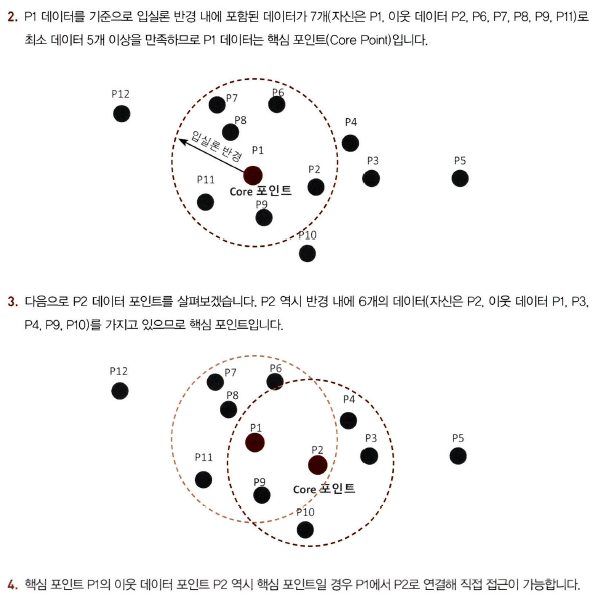

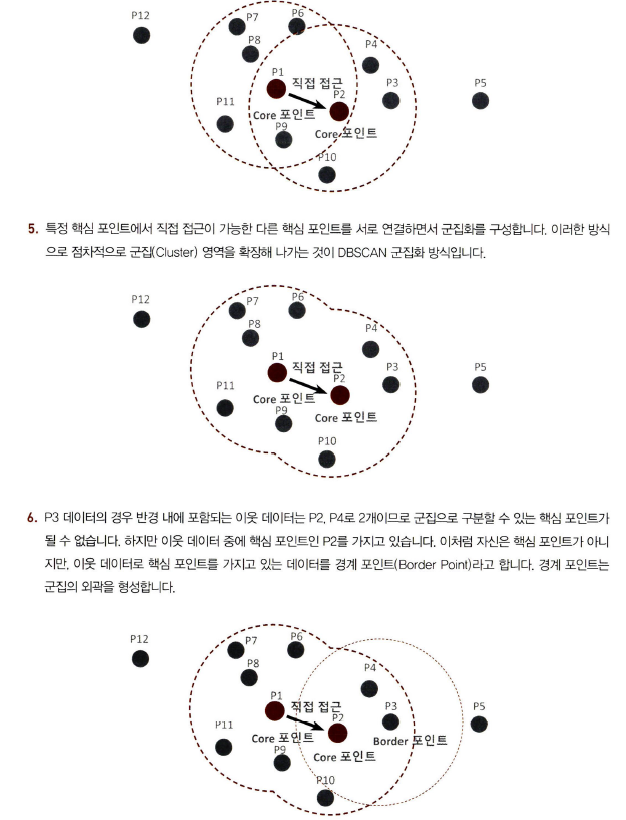

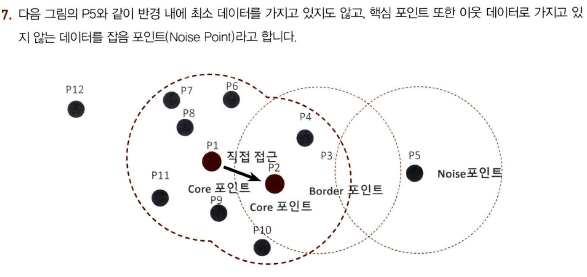

DBSCAN은 입실론 주변영역의 최소 데이터 개수를 포함하는 밀도기준을 충족시키는 데이터인 핵심포인트를 연결하며 군집화를 구성한다.

**DBSCAN적용하기**


In [44]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [45]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


dbscan_cluster을 살펴보면 -1이 군집 레이블로 있다. -1은 노이즈에 속하는 군집이다. 따라서 위의 붓꽃 데이터세트는 0과 1 두개의 군집으로 군집화 되었다.

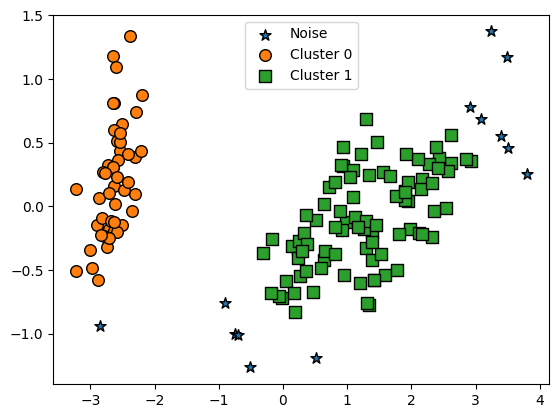

In [46]:
# PCA를 이용해 2개의 피처로 압축변환
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

PCA로 2차원 표현하면 이상치인 노이즈 데이터가 명확하게 드러난다.

-> eps값을 크게하면 반경이 커져 포함하는 데이터가 많아져 노이즈 데이터가 적어진다.
-> min_samples를 크게하면 더 많은 데이터를 포함시켜야하므로 노이즈 데이터 개수가 커지게 된다.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


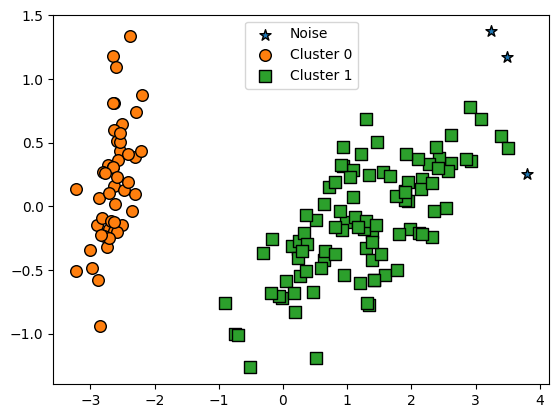

In [48]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

노이즈 군집인 -1이 3밖에 없다. eps가 0.6일때 노이즈로 분류된 데이터세트는 eps반경이 커지면서 cluster1에 소속되었다.

In [49]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')

**DBSCAN적용하기-makes_Circles()데이터 세트**
* make_cirles() 함수로 원의 내부와 외부 2차원 데이터 세트를 만든다
* make_circles()는 오직 2개의 피처만을 생성하므로 피처개수를 지정할 필요가 없다.

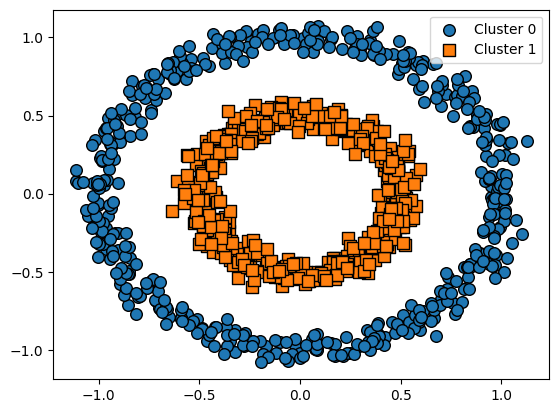

In [50]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-39-f4c266540d94>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\


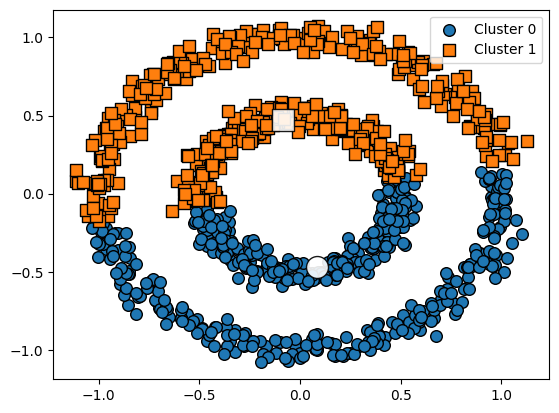

In [51]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

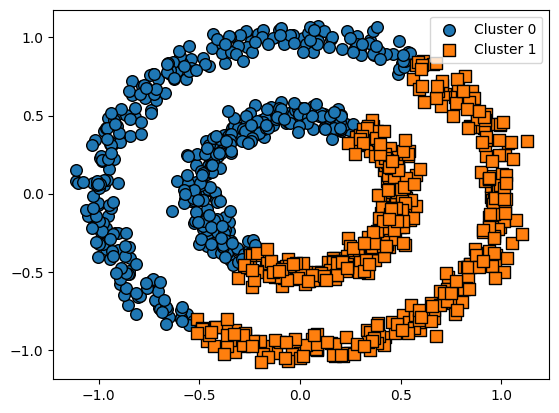

In [52]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

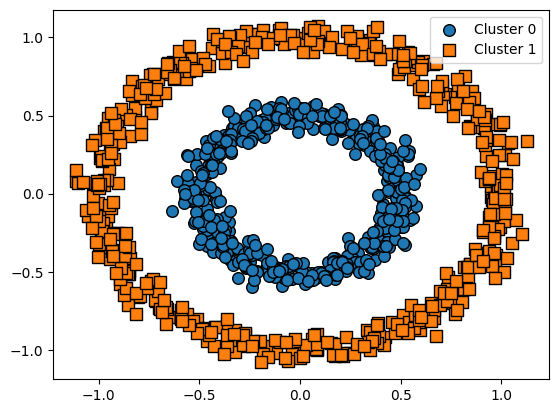

In [53]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)